<a href="https://colab.research.google.com/github/p-rakesh/Python-scripts/blob/main/EDA_and_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q yfinance

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-06-30,129.470001,131.250000,128.949997,130.360001,130.360001,54310500,AMAZON
2023-07-03,130.820007,131.850006,130.070007,130.220001,130.220001,28264800,AMAZON
2023-07-05,130.240005,131.399994,129.639999,130.380005,130.380005,35895400,AMAZON
2023-07-06,128.250000,128.729996,127.370003,128.360001,128.360001,40639900,AMAZON
2023-07-07,128.589996,130.970001,128.130005,129.779999,129.779999,41928700,AMAZON
2023-07-10,129.070007,129.279999,125.919998,127.129997,127.129997,61889300,AMAZON
2023-07-11,127.750000,129.770004,127.349998,128.779999,128.779999,49951500,AMAZON
2023-07-12,130.309998,131.259995,128.830002,130.800003,130.800003,54022800,AMAZON
2023-07-13,134.039993,134.669998,132.710007,134.300003,134.300003,61170900,AMAZON


In [ ]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,156.788367,158.604303,155.212590,157.021514,157.021514,7.133482e+07
std,15.823084,15.610016,16.161816,15.940583,15.940583,2.290445e+07
min,126.010002,127.769997,124.169998,125.019997,125.019997,3.145820e+07
25%,145.815002,147.340004,144.014999,145.919998,145.919998,5.488205e+07
50%,153.699997,155.570007,151.919998,153.850006,153.850006,6.802880e+07
75%,167.500000,169.025002,166.449997,167.550003,167.550003,8.161725e+07
max,193.779999,194.479996,191.759995,193.970001,193.970001,1.647624e+08


In [ ]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-07-15 to 2023-07-14
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


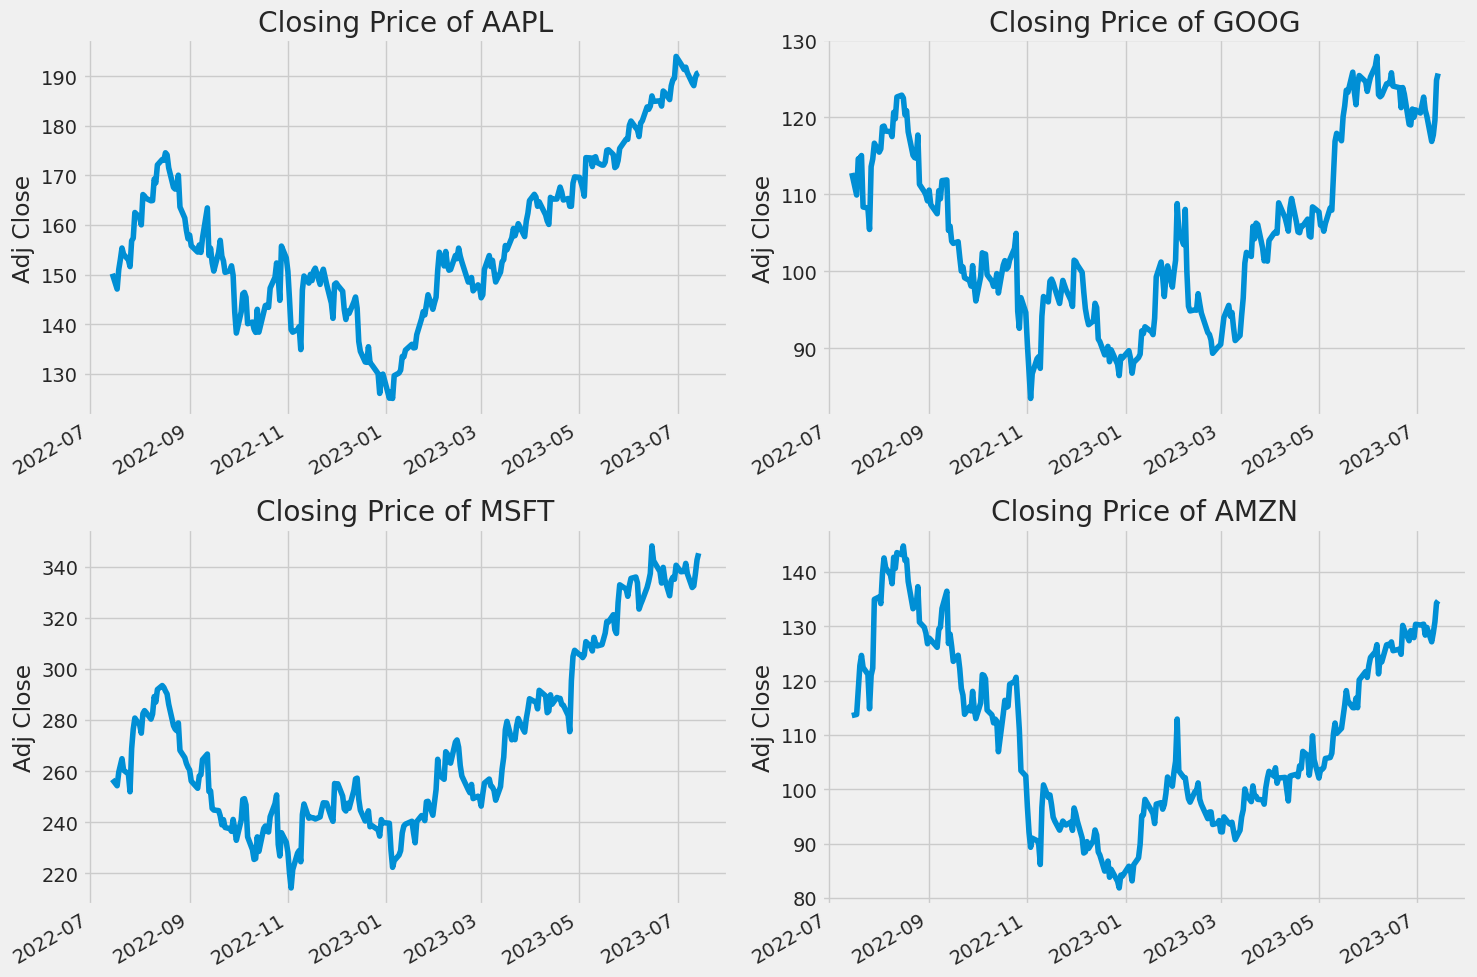

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

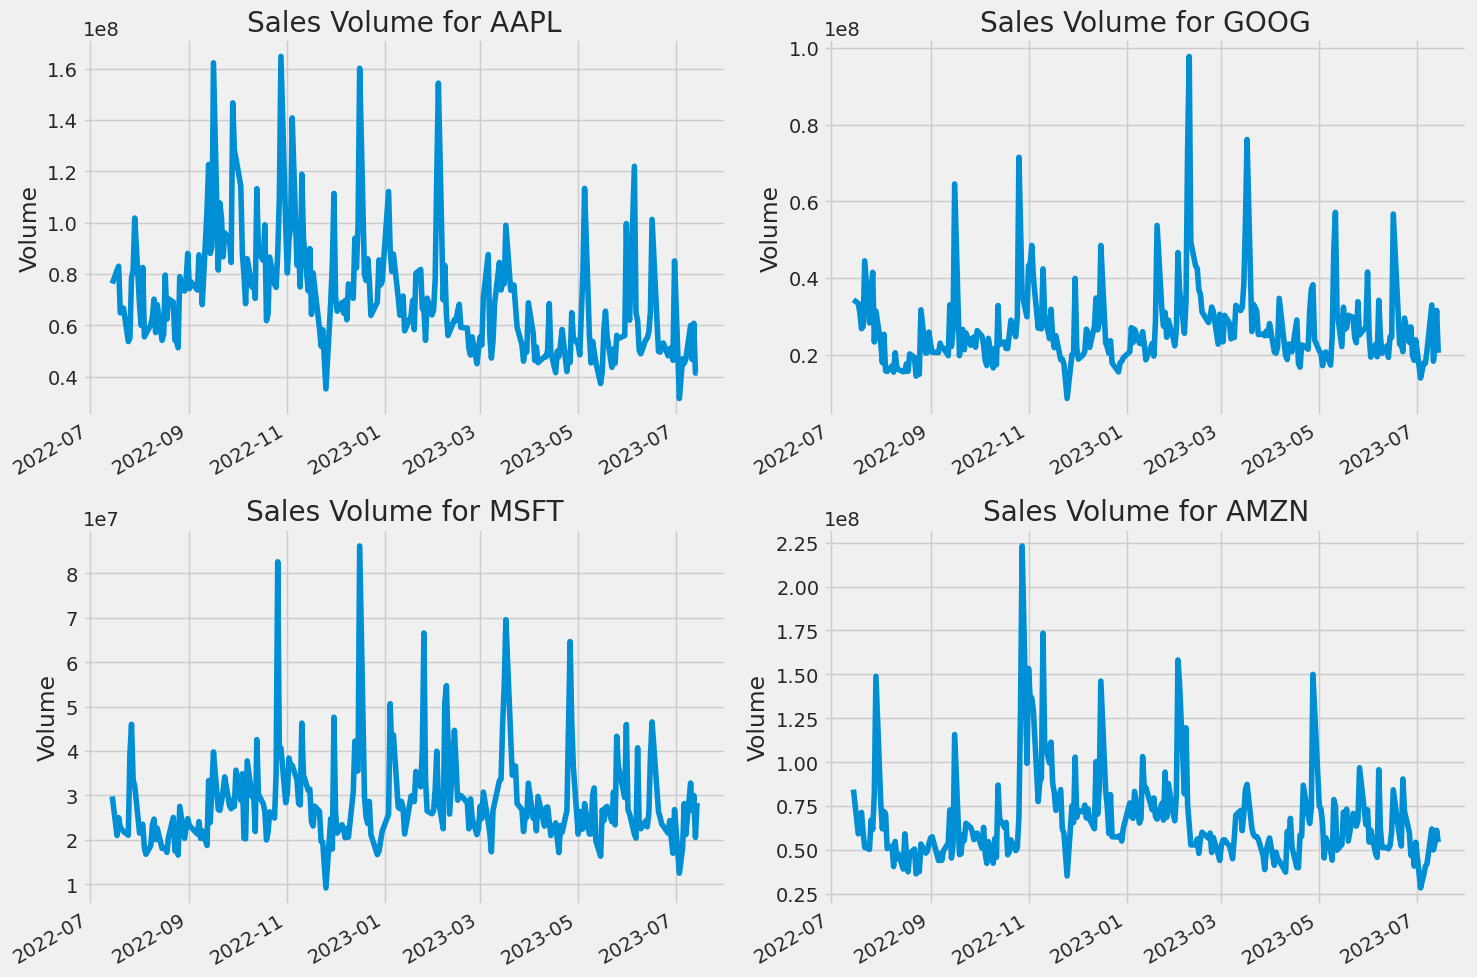

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

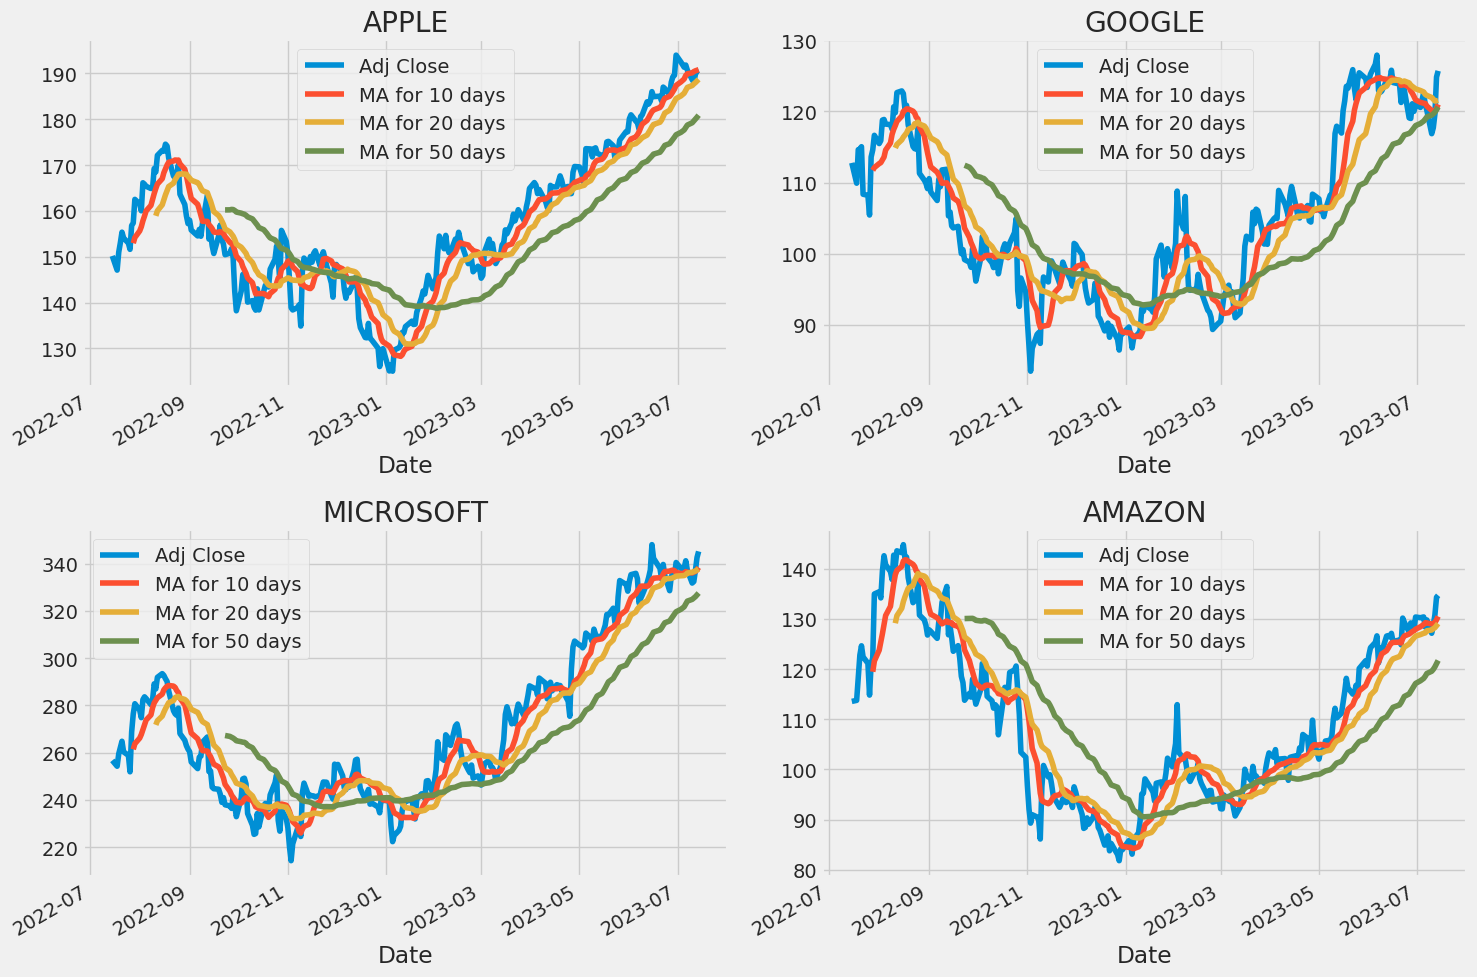

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

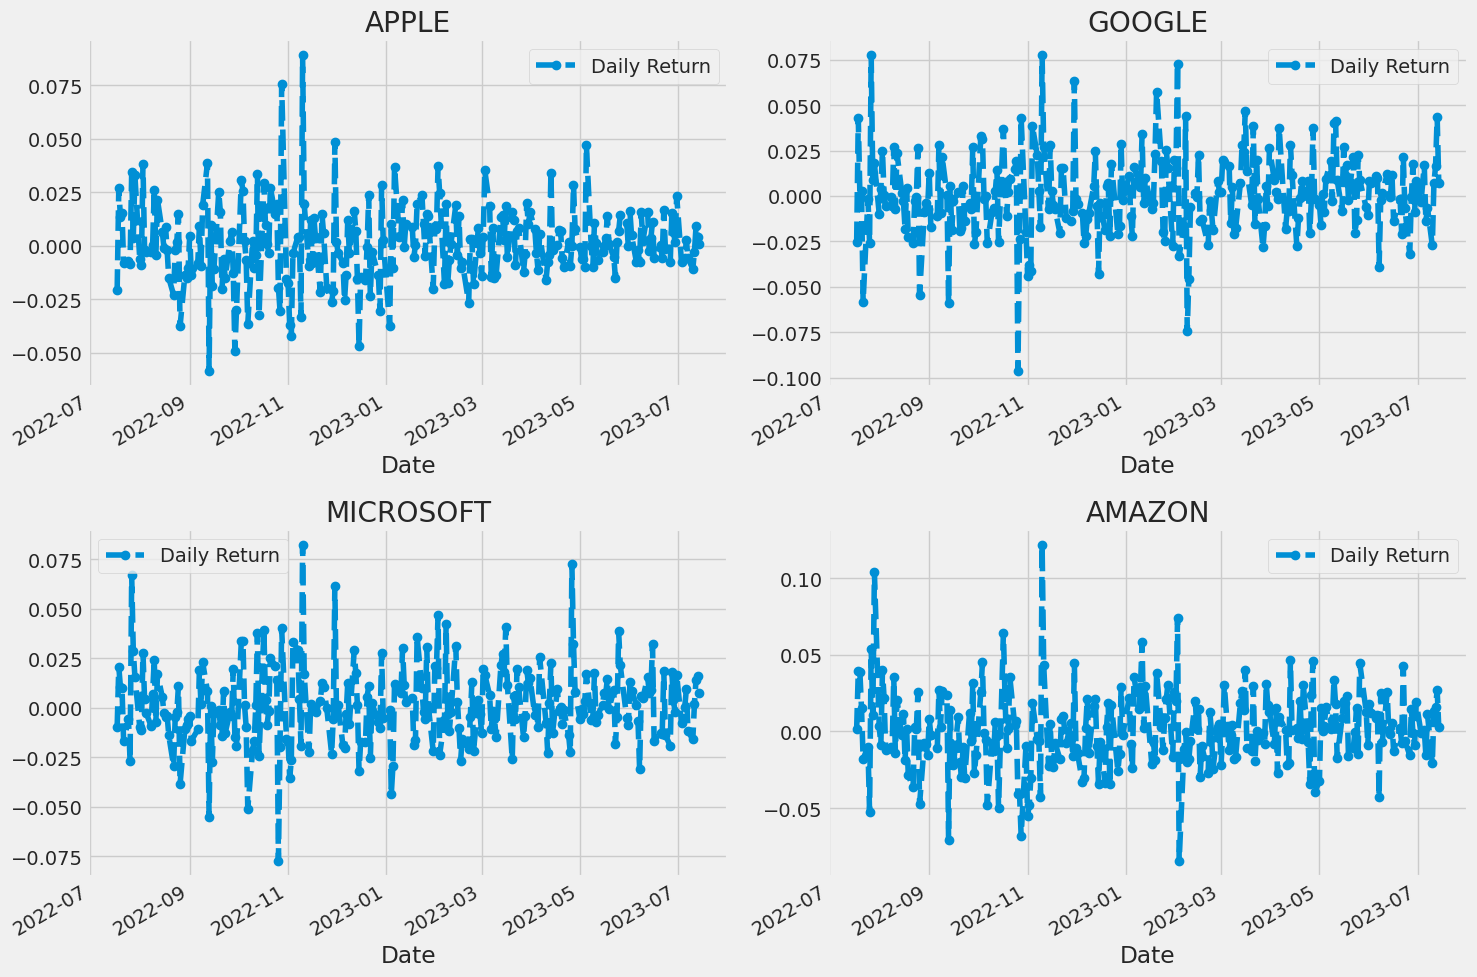

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

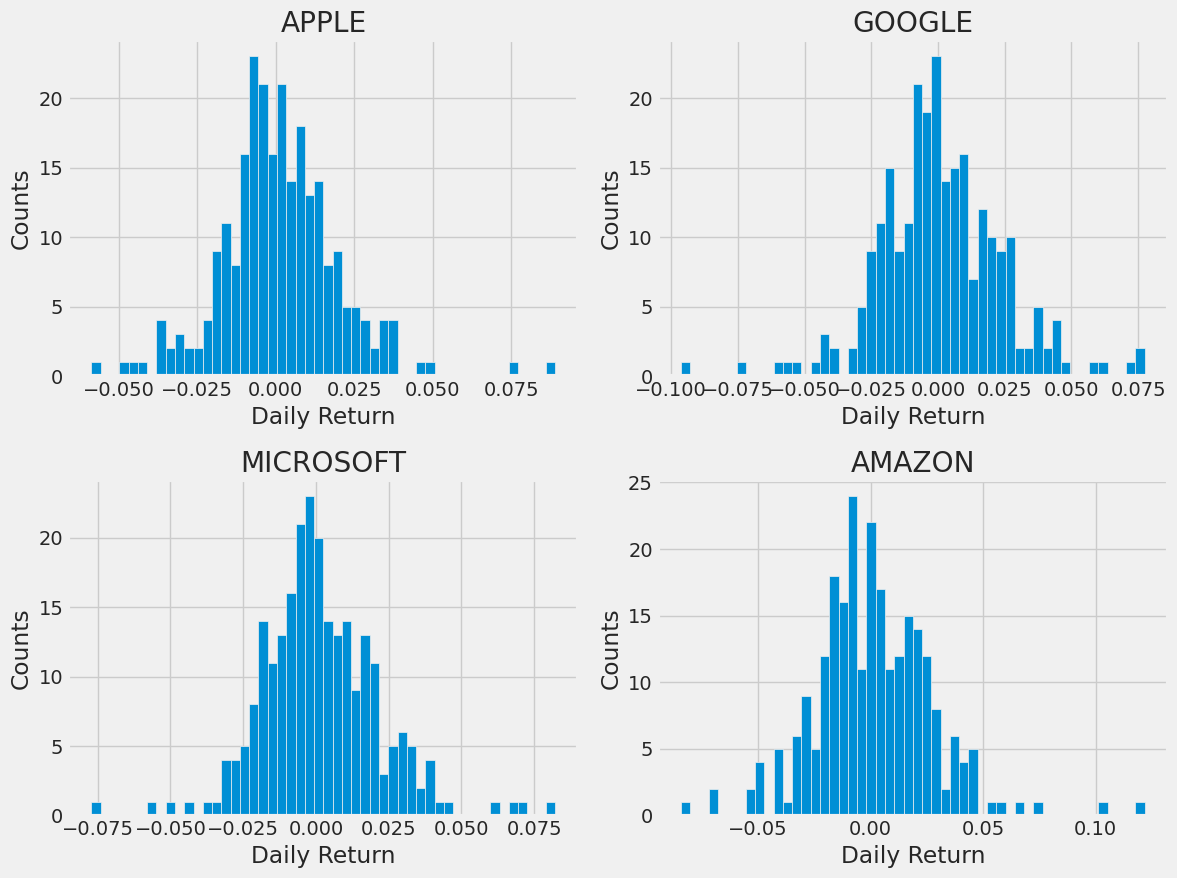

In [ ]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-07-15,NaN,NaN,NaN,NaN
2022-07-18,-0.020643,0.001849,-0.025335,-0.009621
2022-07-19,0.026722,0.039117,0.042853,0.020767
2022-07-20,0.013510,0.038575,0.000698,0.010557
2022-07-21,0.015094,0.015150,0.002964,0.009799


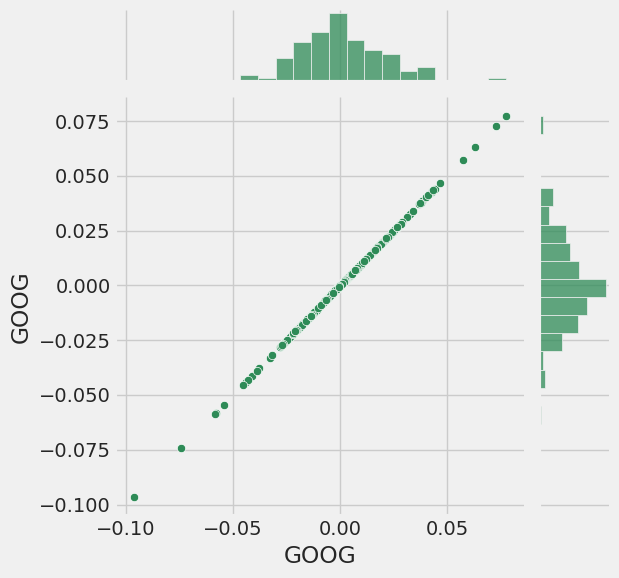

In [ ]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

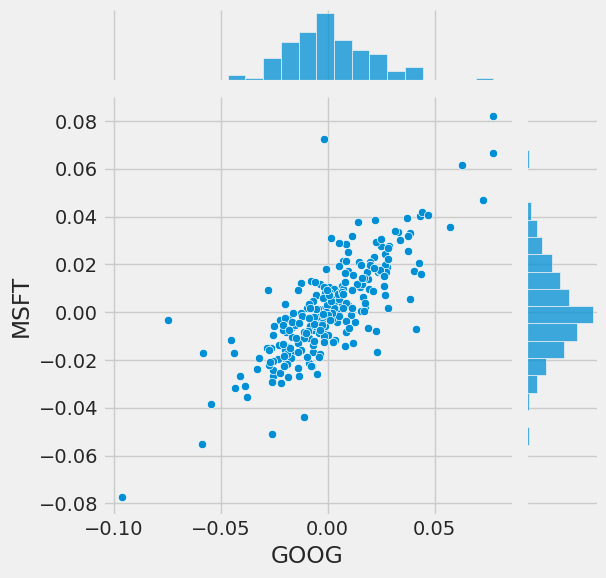

In [ ]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

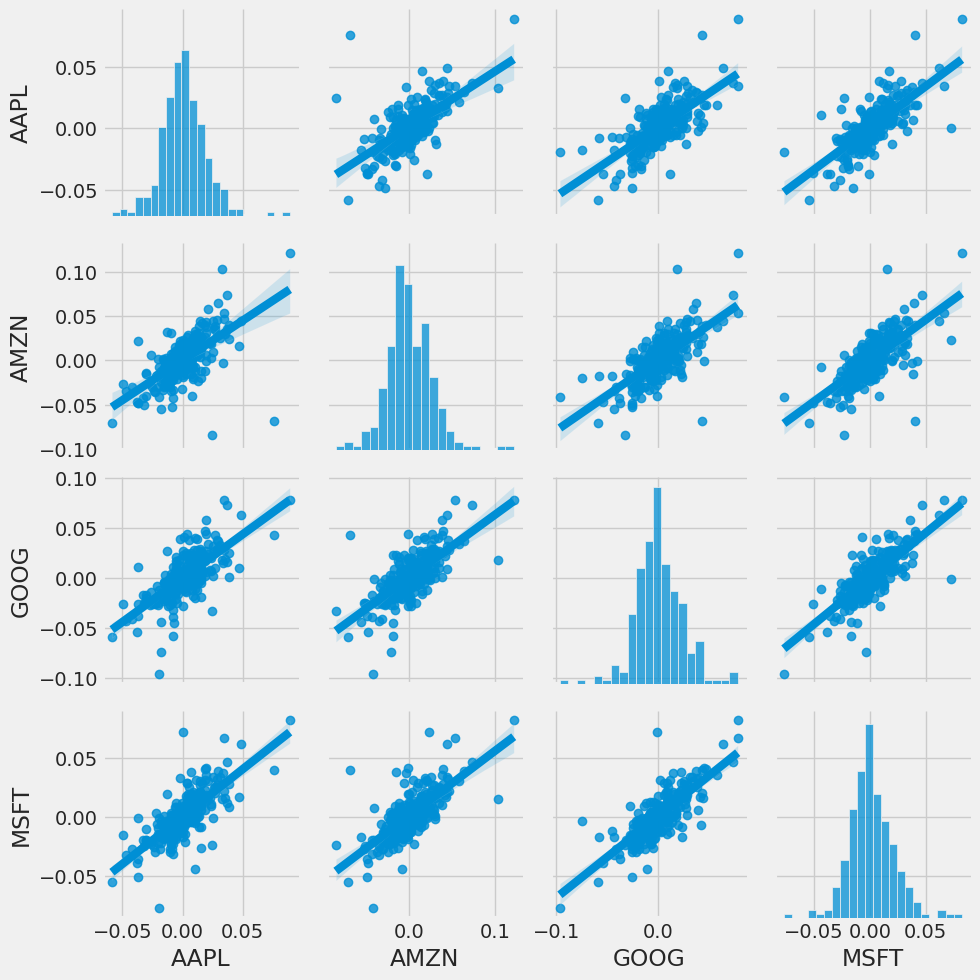

In [ ]:
sns.pairplot(tech_rets, kind='reg')

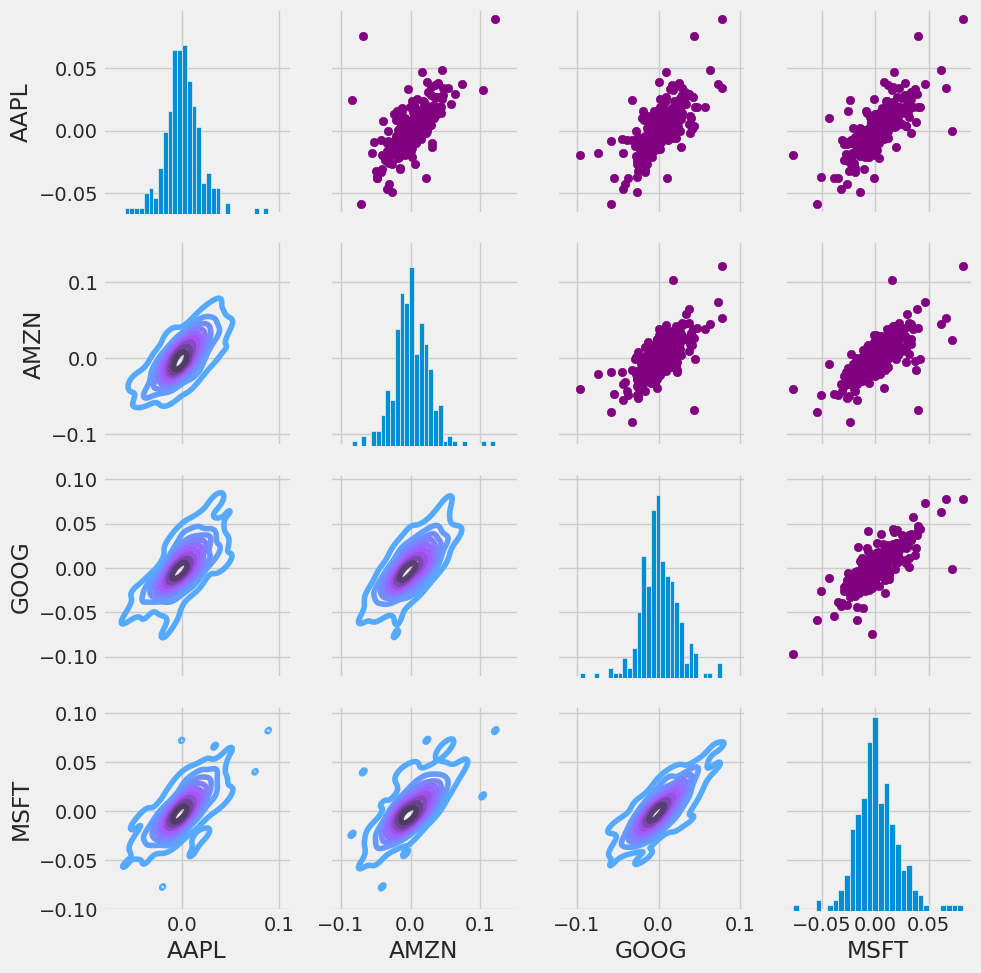

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

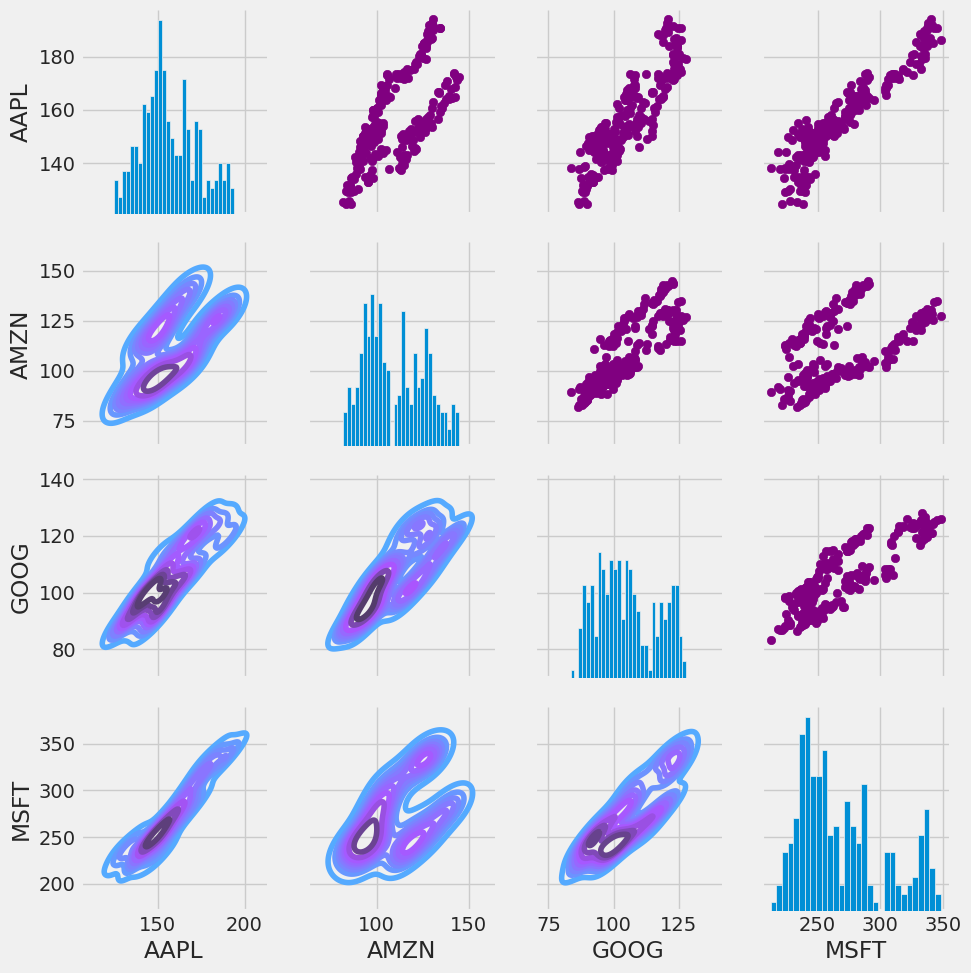

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

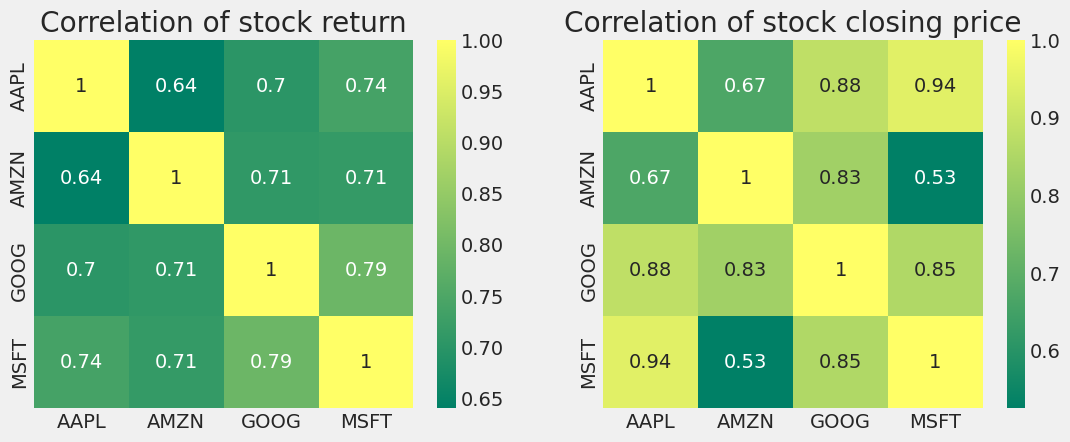

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

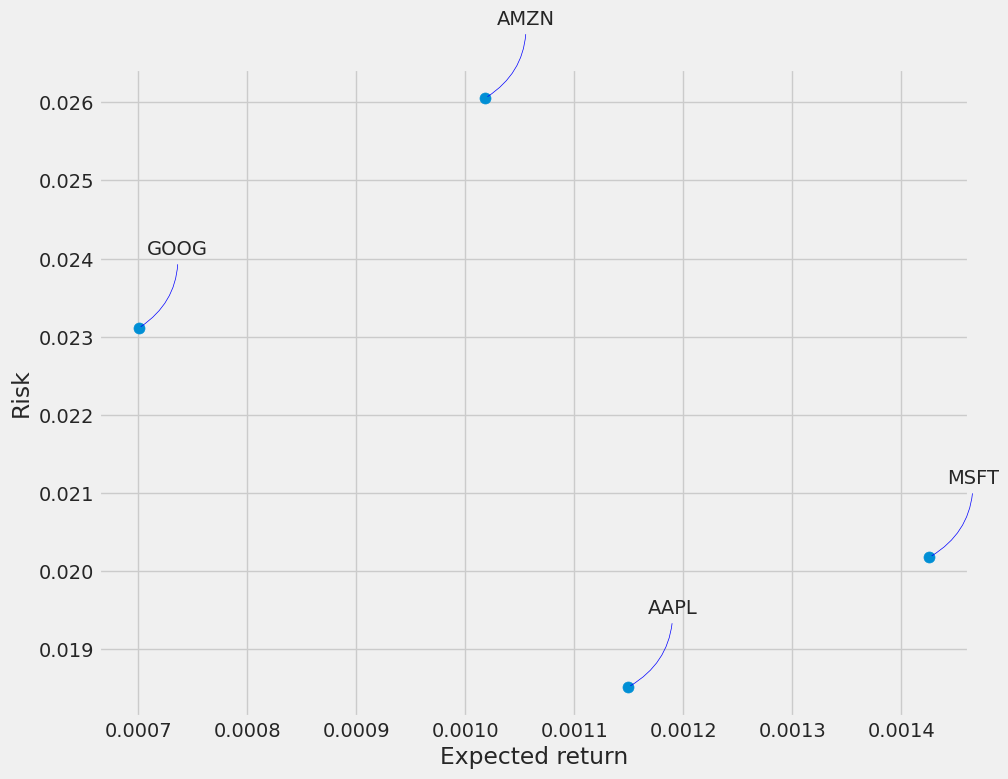

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [ ]:
# df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# df = pdr.get_data_yahoo('HDFCBANK.NS', start='2012-01-01', end=datetime.now())
df = pdr.get_data_yahoo('KALYANKJIL.NS', start='2012-01-01', end=datetime.now())

# Show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-26,73.949997,81.000000,72.900002,75.199997,75.199997,51421860
2021-03-30,75.949997,77.900002,69.650002,70.849998,70.849998,11091947
2021-03-31,71.750000,71.750000,67.650002,68.099998,68.099998,4659613
2021-04-01,68.599998,72.750000,68.199997,71.400002,71.400002,7403570
2021-04-05,71.500000,71.500000,68.550003,69.900002,69.900002,2399032
...,...,...,...,...,...,...
2023-07-10,163.750000,165.000000,157.199997,163.800003,163.800003,9240089
2023-07-11,164.899994,175.899994,164.250000,174.199997,174.199997,23760974
2023-07-12,177.600006,184.350006,177.050003,179.600006,179.600006,27263371


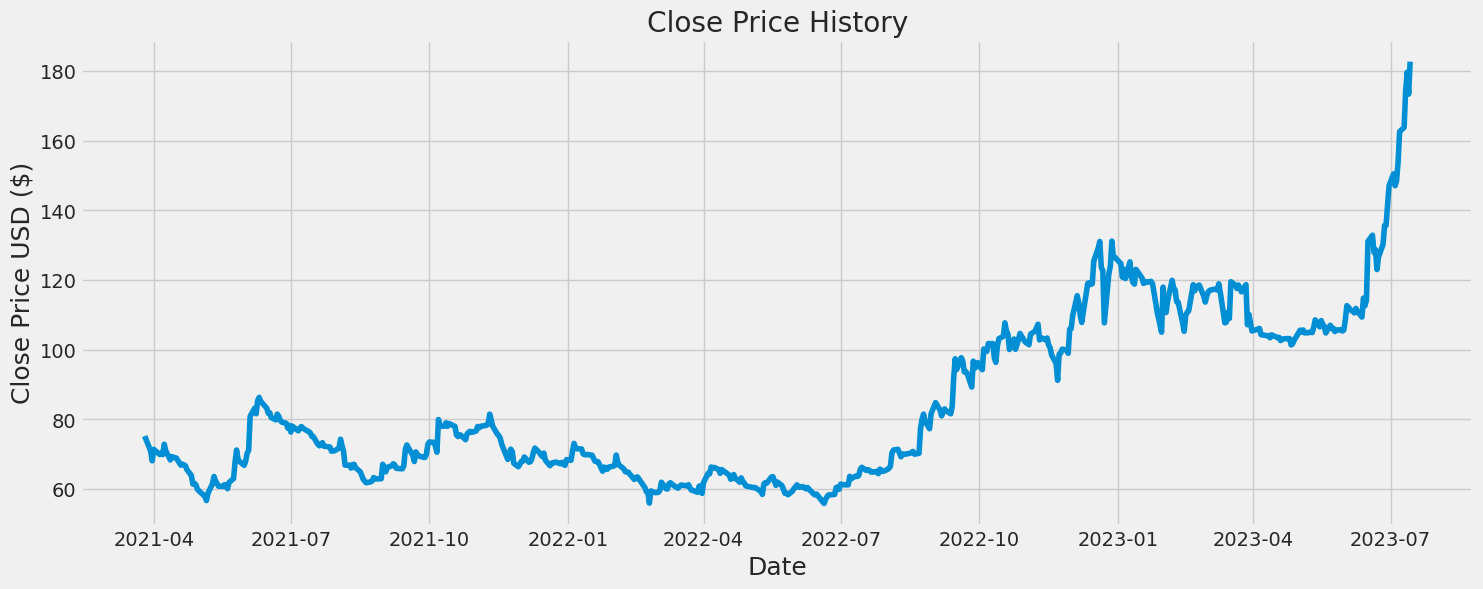

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
data = df.filter(['Close'])
# data= df[['Close','Open','Volume']]
# Convert the dataframe to a numpy array
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))

# Get the number of rows to train the model on
# print(np.shape(dataset))
# dataset=dataset.reshape(-1,1)
# print(np.shape(dataset),dataset)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# print(np.shape(scaled_data))
# scaled_data=scaled_data.reshape(-1,1)
# print(np.shape(scaled_data))


In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 30:
        print(x_train)
        print(y_train)
        print()
print(np.shape(x_train),np.shape(y_train))
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
# print(np.shape(y_train))
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

(482, 60) (482,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

482/482 [==============================] - 28s 47ms/step - loss: 0.0027


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len -60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)
# print(np.shape(x_test),len(test_data)+60,x_test)

In [ ]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


1/1 [==============================] - 1s 918ms/step


                 Close  Predictions
Date                               
2023-06-06  111.099998   115.033463
2023-06-07  110.550003   115.813370
2023-06-08  111.849998   116.469788
2023-06-09  111.000000   117.115570
2023-06-12  109.349998   117.623322
2023-06-13  114.800003   117.863388
2023-06-14  112.599998   118.415733
2023-06-15  114.199997   118.898773
2023-06-16  131.100006   119.447952
2023-06-19  132.850006   121.488350
2023-06-20  127.900002   124.346962
2023-06-21  128.649994   126.993973
2023-06-22  123.000000   129.368286
2023-06-23  126.599998   130.879395
2023-06-26  130.199997   132.095215
2023-06-27  135.649994   133.349991
2023-06-28  135.649994   134.997818
2023-06-30  147.050003   136.722198
2023-07-03  150.449997   139.353134
2023-07-04  147.050003   142.554504
2023-07-05  148.449997   145.500427
2023-07-06  153.850006   148.177612
2023-07-07  162.550003   150.941330
2023-07-10  163.800003   154.265579
2023-07-11  174.199997   157.707779
2023-07-12  179.600006   161

<ipython-input-42-425fadf9b5b5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


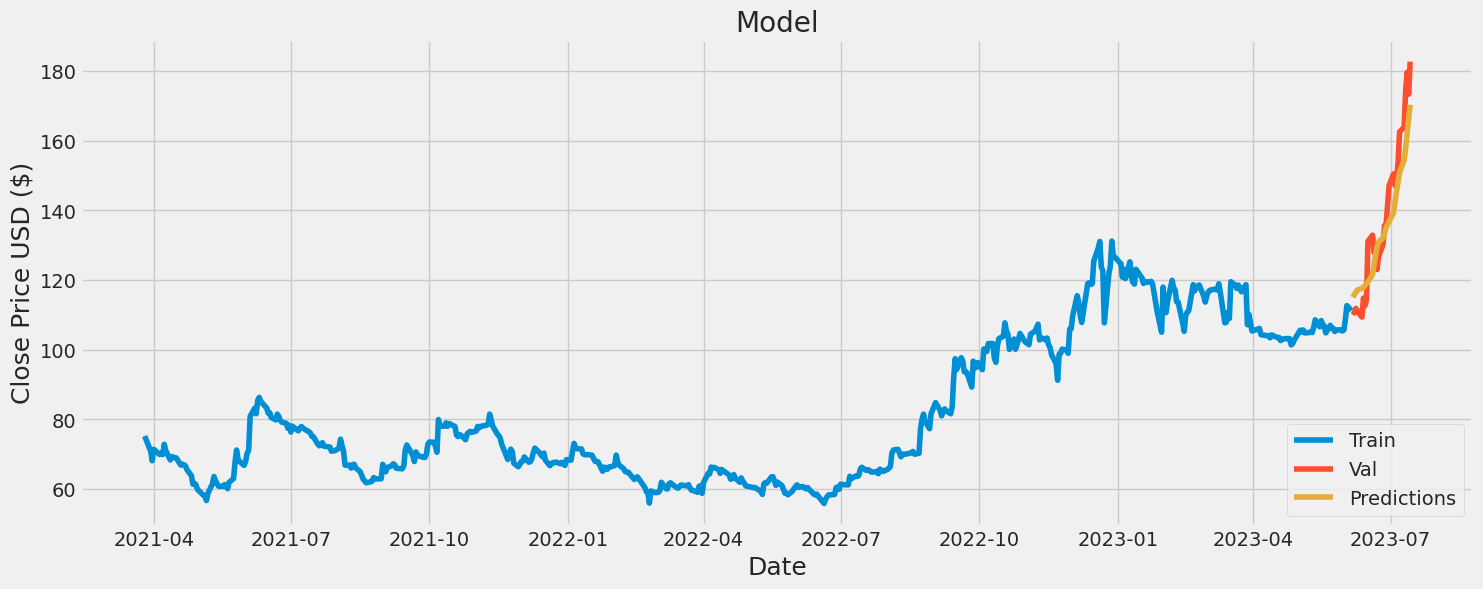

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
print(valid)
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
training_data_len= len(dataset)

In [ ]:
# using this model to find next 60 days prediction
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data_main = scaled_data[training_data_len-120: , :]
# Create the data sets x_test and y_test
x_main = []
# y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data_main)):
    x_main.append(test_data_main[i-60:i, 0])
# x_main_1= scaled_data[-60:]
# Convert the data to a numpy array
x_main = np.array(x_main)

# Reshape the data
x_main = np.reshape(x_main, (x_main.shape[1], x_main.shape[0], 1 ))



In [ ]:

# Get the models predicted price values
predictions = model.predict(x_main)
predictions = scaler.inverse_transform(predictions)


2/2 [==============================] - 0s 42ms/step


In [ ]:
print(np.shape(predictions),predictions)

(60, 1) [[111.59269 ]
 [111.20971 ]
 [110.92705 ]
 [110.73423 ]
 [110.60451 ]
 [110.36167 ]
 [110.106384]
 [109.95307 ]
 [110.12835 ]
 [110.427124]
 [110.82691 ]
 [111.17506 ]
 [111.4738  ]
 [111.740616]
 [111.94393 ]
 [112.231705]
 [112.7293  ]
 [113.12654 ]
 [113.59556 ]
 [113.9575  ]
 [114.19336 ]
 [114.16342 ]
 [114.1805  ]
 [114.13583 ]
 [114.06553 ]
 [113.906334]
 [113.750374]
 [113.61319 ]
 [113.4673  ]
 [113.35581 ]
 [113.54447 ]
 [114.23859 ]
 [115.03346 ]
 [115.81337 ]
 [116.46979 ]
 [117.11557 ]
 [117.62332 ]
 [117.86339 ]
 [118.41573 ]
 [118.89877 ]
 [119.44795 ]
 [121.48835 ]
 [124.34696 ]
 [126.99397 ]
 [129.36829 ]
 [130.8794  ]
 [132.09521 ]
 [133.34999 ]
 [134.99782 ]
 [136.7222  ]
 [139.35313 ]
 [142.5545  ]
 [145.50043 ]
 [148.17761 ]
 [150.94133 ]
 [154.26558 ]
 [157.70778 ]
 [161.82289 ]
 [166.39894 ]
 [170.27385 ]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the historical AAPL stock price data into a DataFrame
data = df # Replace 'aapl_data.csv' with the actual file path or data source

# Preprocess the data (e.g., handle missing values, scale features)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Prepare the training data
lookback = 60  # Number of previous time steps to use as input
X_train, y_train = [], []
for i in range(lookback, len(scaled_data)-3):
    X_train.append(scaled_data[i-lookback:i, 0])
    y_train.append(scaled_data[i+3, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the input data for LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Create and train the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Prepare the input data for future predictions


# Plot the predicted prices


Epoch 1/10
16/16 [==============================] - 6s 70ms/step - loss: 0.0196
Epoch 2/10
16/16 [==============================] - 1s 67ms/step - loss: 0.0044
Epoch 3/10
16/16 [==============================] - 1s 73ms/step - loss: 0.0032
Epoch 4/10
16/16 [==============================] - 1s 75ms/step - loss: 0.0028
Epoch 5/10
16/16 [==============================] - 1s 70ms/step - loss: 0.0028
Epoch 6/10
16/16 [==============================] - 1s 68ms/step - loss: 0.0026
Epoch 7/10
16/16 [==============================] - 1s 71ms/step - loss: 0.0024
Epoch 8/10
16/16 [==============================] - 1s 75ms/step - loss: 0.0021
Epoch 9/10
16/16 [==============================] - 2s 122ms/step - loss: 0.0019
Epoch 10/10
16/16 [==============================] - 2s 137ms/step - loss: 0.0018


In [ ]:
last_inputs = scaled_data[-lookback:]
X_future = np.array([last_inputs])

# Reshape the input data for LSTM [samples, time steps, features]
X_future = np.reshape(X_future, (X_future.shape[0], X_future.shape[1], 1))

# Make predictions for the future data
predictions = model.predict(X_future)

# Inverse transform the scaled predictions to get actual stock prices
predicted_prices = scaler.inverse_transform(predictions)

# Print the predicted stock prices
print(predicted_prices,np.shape(X_future))

1/1 [==============================] - 2s 2s/step
[[197.73314]] (1, 60, 1)


In [ ]:
print(len(last_inputs))

60
